<a href="https://colab.research.google.com/github/NehaNeha417/loan_prediction/blob/master/Bigmart_sales_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [762]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [763]:
d_train = pd.read_csv('/content/datasets_9961_14084_Train - Copy.csv')
d_test = pd.read_csv('/datasets_9961_14084_Test.csv')

In [764]:
d_train.tail(1000)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7523,FDR28,13.850,Regular,0.025937,Frozen Foods,164.9210,OUT049,1999,Medium,Tier 1,Supermarket Type1,2609.9360
7524,FDH57,10.895,Low Fat,0.035950,Fruits and Vegetables,132.9284,OUT017,2007,NaN,Tier 2,Supermarket Type1,3295.7100
7525,FDC04,15.600,Low Fat,0.045169,Dairy,242.9854,OUT018,2009,Medium,Tier 3,Supermarket Type2,2175.1686
7526,NCI06,11.300,Low Fat,0.047678,Household,181.4660,OUT013,1987,High,Tier 3,Supermarket Type1,3775.0860
7527,NCY53,20.000,Low Fat,0.058812,Health and Hygiene,111.6544,OUT017,2007,NaN,Tier 2,Supermarket Type1,1565.9616
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [765]:
d_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [766]:
print(d_train.shape)
print(d_test.shape)

(8523, 12)
(5681, 11)


In [767]:
print(d_train.columns)
print(d_test.columns)

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')
Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')


In [768]:
d_train.Item_Fat_Content.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [769]:
d_train.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [770]:
d_train.Item_Weight.fillna(d_train.Item_Weight.mean(),inplace=True)

In [771]:
d_train.Outlet_Size.fillna(d_train.Outlet_Size.bfill,inplace=True)

In [772]:
d_train.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f883a0c4a90>,
      dtype=object)

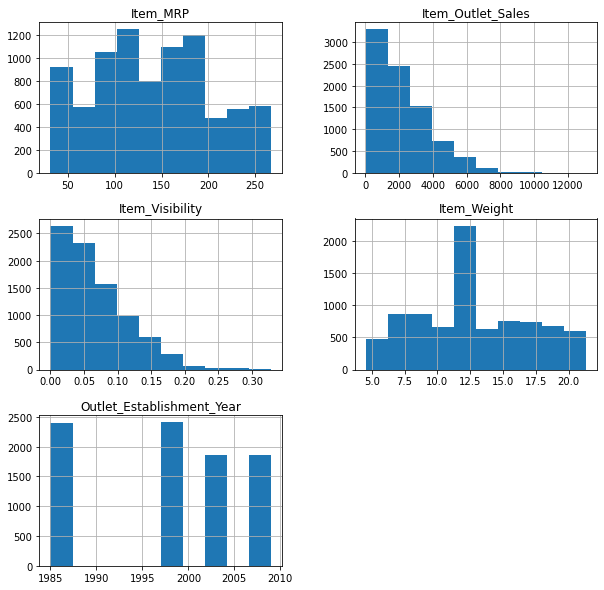

In [773]:
d_train.hist(figsize=(10,10))

From HISTOGRAM, It can be concluded that Outlet_Establishment_Year doesn't affect the sales much

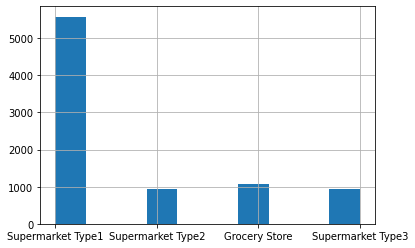

In [774]:
d_train.Outlet_Type.hist()

So, sales largly depends upon Outlet_type

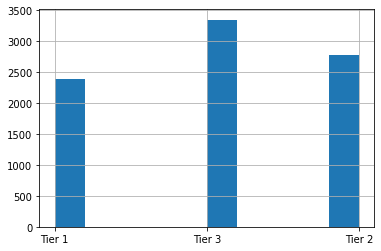

In [775]:
d_train.Outlet_Location_Type.hist()

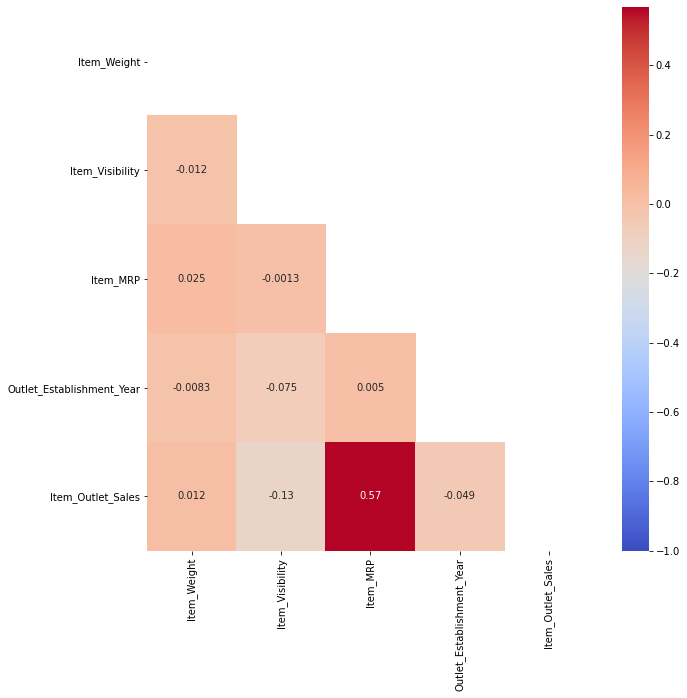

In [776]:
z = d_train.corr()
plt.figure(figsize=(10,10))
mask = np.zeros_like(z, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(z, 
            vmin = -1,
            cmap='coolwarm',
            annot=True,
            mask=mask)
# plt.savefig('corr-matrix.png')
plt.show()

In [777]:
from sklearn import preprocessing
#a= d_train.Item_Outlet_Sales.min()
#b = d_train.Item_Outlet_Sales.max()
d_train.Item_Outlet_Sales = preprocessing.scale(d_train.Item_Outlet_Sales)
#d_train.Item_Visibility = preprocessing.scale(d_train.Item_Visibility)
d_train.Item_MRP = preprocessing.scale(d_train.Item_MRP)
d_train.Item_Weight = preprocessing.scale(d_train.Item_Weight)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8839d0e828>,
      dtype=object)

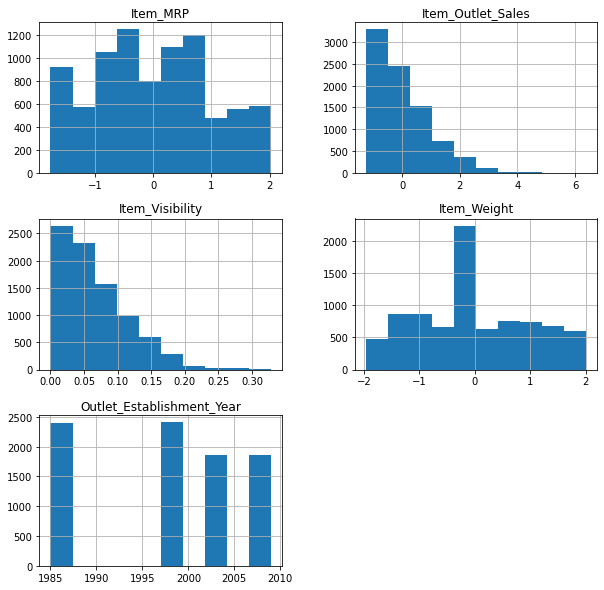

In [778]:
d_train.hist(figsize=(10,10))

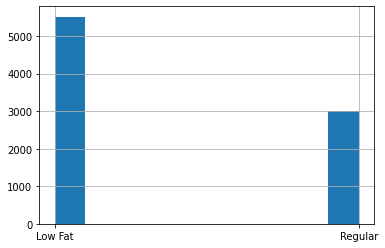

In [779]:
d_train.Item_Fat_Content.hist()

In [780]:
d_train.Item_Fat_Content.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [781]:
d_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [782]:
print(d_train.Item_Type.value_counts())
print(d_train.Outlet_Type.value_counts())

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64


In [783]:
d_train = pd.get_dummies(d_train,columns=['Item_Type'])
d_train = pd.get_dummies(d_train,columns=['Outlet_Type'])

In [784]:
print(d_train.Outlet_Location_Type.value_counts())
print(d_train.Outlet_Identifier.value_counts())
#print(d_train.Outlet_Size.value_counts())

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64
OUT027    935
OUT013    932
OUT035    930
OUT046    930
OUT049    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64


In [785]:
d_train = pd.get_dummies(d_train,columns=['Outlet_Location_Type'])
d_train = pd.get_dummies(d_train,columns=['Outlet_Identifier'])

In [786]:
d_train.Item_Fat_Content = pd.get_dummies(d_train.Item_Fat_Content)

In [787]:
#d_train = pd.get_dummies(d_train,columns=['Outlet_Size'])

In [788]:
#d_train.Outlet_Size.hist()

In [789]:
# from sklearn.preprocessing import OneHotEncoder
# onehot = OneHotEncoder()
# d_train.Outlet_Size= onehot.fit_transform(d_train.Outlet_Size.reshape(-1,1)).toarray()


In [790]:
print(d_train.columns)

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Item_Outlet_Sales', 'Item_Type_Baking Goods', 'Item_Type_Breads',
       'Item_Type_Breakfast', 'Item_Type_Canned', 'Item_Type_Dairy',
       'Item_Type_Frozen Foods', 'Item_Type_Fruits and Vegetables',
       'Item_Type_Hard Drinks', 'Item_Type_Health and Hygiene',
       'Item_Type_Household', 'Item_Type_Meat', 'Item_Type_Others',
       'Item_Type_Seafood', 'Item_Type_Snack Foods', 'Item_Type_Soft Drinks',
       'Item_Type_Starchy Foods', 'Outlet_Type_Grocery Store',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3', 'Outlet_Location_Type_Tier 1',
       'Outlet_Location_Type_Tier 2', 'Outlet_Location_Type_Tier 3',
       'Outlet_Identifier_OUT010', 'Outlet_Identifier_OUT013',
       'Outlet_Identifier_OUT017', 'Outlet_Identifier_OUT018',
       'Outlet_Identifier_OUT019',

In [791]:
d_train.shape

(8523, 41)

In [792]:
#d_train.head()

In [793]:
x = d_train.drop(['Item_Outlet_Sales','Outlet_Establishment_Year','Outlet_Size','Item_Identifier'],axis=1)
y = d_train['Item_Outlet_Sales']

In [809]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,bagging
from sklearn.neighbors import KNeighborsRegressor as KNR

In [795]:
from sklearn.metrics import mean_squared_error

In [796]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42,shuffle=True)


In [797]:
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
mse = mean_squared_error(y_test,y_pred)
print(mse)
rmse = (mse)**(0.5)
print('rmse:',rmse)
acc = 1-mse
print('accuracy = ',acc*100)

0.39272669518301595
rmse: 0.6266791006432366
accuracy =  60.7273304816984


In [798]:
sr = svm.SVR(C=0.01)
sr.fit(x_train,y_train)
y_pred = sr.predict(x_test)
mse = mean_squared_error(y_test,y_pred)
print(mse)
acc = 1-mse
print('accuracy = ',acc*100)

0.43117014715025215
accuracy =  56.88298528497479


In [806]:
i =[20]
test_score=[]
for ele in i:
  model = RandomForestRegressor(n_estimators=ele,max_depth=8,max_features=8)
  model.fit(x_train,y_train)
  y_pred = model.predict(x_test)
  mse = mean_squared_error(y_test,y_pred)
  print(mse)
  acc = 1-mse
  test_score.append(acc)
print(test_score)



0.38753041274674094
[0.6124695872532591]


In [811]:
dt = DecisionTreeRegressor(max_depth=8,max_features=8,random_state=42)
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)
mse = mean_squared_error(y_test,y_pred)
print(mse)
acc = 1-mse
print('accuracy = ',acc*100)


0.39170636539514675
accuracy =  60.82936346048533


In [810]:
knr = KNR()
knr.fit(x_train,y_train)
y_pred = knr.predict(x_test)
mse = mean_squared_error(y_test,y_pred)
print(mse)
acc = 1-mse
print('accuracy = ',acc*100)

0.4396210650412319
accuracy =  56.03789349587681


In [814]:
from sklearn.ensemble import BaggingRegressor
dt = DecisionTreeRegressor(max_depth=8,max_features=8,random_state=42)
n =[200,250,300,400,1000]
test_error=[]
for k in n:
  bc = BaggingRegressor(base_estimator=dt,n_estimators=k,n_jobs=-1)
  bc.fit(x_train,y_train)
  y_pred = bc.predict(x_test)
  mse = mean_squared_error(y_test,y_pred)
  test_error.append(mse)
print(test_error)

[0.3750757890524591, 0.3761462282115254, 0.3789606497109757, 0.3800663910641649, 0.3785535512045532]


In [816]:
from sklearn.ensemble import VotingRegressor
from sklearn.neighbors import KNeighborsRegressor
#VC = VotingClassifier()
knr = KNeighborsRegressor()
dt = DecisionTreeRegressor(max_depth=8,max_features=8,random_state=42)
sr = svm.SVR(C=0.01)
Regressors= [('K Nearest Neighbour',knr),('Decision Tree',dt),('SVR',sr)]
for clf_name,clf in Regressors:
  clf.fit(x_train,y_train)
  y_pred=clf.predict(x_test)
  mse = mean_squared_error(y_test,y_pred)
  print(mse)

0.4396210650412319
0.39170636539514675
0.43117014715025215


In [817]:
VR = VotingRegressor(estimators=Regressors)
VR.fit(x_train,y_train)
y_pred = VR.predict(x_test)
mse = mean_squared_error(y_test,y_pred)
print(mse)

0.3793517254389462
